# Task 1

In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Identify the dataset:
Reykjavik = np.array([-1.3, -1, 0.1, 3.0, 6.4, 9.9, 11.6, 10.8, 7.9, 3.9, 1.0, -1.2]) #https://en.climate-data.org/europe/iceland/reykjavik/reykjavik-764736/
Tokyo = np.array([4.0, 5.0, 8.5, 13.4, 18.2, 21.5, 25.3, 26.5, 23.2, 17.7, 12.1, 6.7]) #https://en.climate-data.org/asia/japan/tokyo/tokyo-3292/
Dubai = np.array([19.4, 20.7, 22.3, 27.7, 31.8, 33.8, 35.6, 35.7, 33.2, 30, 25.5, 21.3]) #https://en.climate-data.org/asia/united-arab-emirates/dubai/dubai-705/ 
Cities = np.array([Reykjavik, Tokyo, Dubai], dtype=float)
# Visualise the data frame
pd.DataFrame(Cities)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.3,-1.0,0.1,3.0,6.4,9.9,11.6,10.8,7.9,3.9,1.0,-1.2
1,4.0,5.0,8.5,13.4,18.2,21.5,25.3,26.5,23.2,17.7,12.1,6.7
2,19.4,20.7,22.3,27.7,31.8,33.8,35.6,35.7,33.2,30.0,25.5,21.3


In [3]:
# Calculate the mean and standard deviation
mean = np.mean(Cities)
print("Mean of Cities: ", mean)

std = np.std(Cities)
print("Standard Deviation of Cities: ", std)

mean_city1 = np.mean(Reykjavik)
print("Mean of Reykjavik: ", mean_city1)

mean_city2 = np.mean(Tokyo)
print("Mean of Tokyo: ", mean_city2)

mean_city3 = np.mean(Dubai)
print("Mean of Dubai: ", mean_city3)

std_City1 = np.std(Reykjavik)
print("Standard Deviation of Reykjavik: ", std_City1)

std_City2 = np.std(Tokyo)
print("Standard Deviation of Tokyo: ", std_City2)

std_City3 = np.std(Dubai)
print("Standard Deviation of Dubai: ", std_City3)

Mean of Cities:  15.83888888888889
Standard Deviation of Cities:  11.53883004318168
Mean of Reykjavik:  4.258333333333333
Mean of Tokyo:  15.174999999999997
Mean of Dubai:  28.083333333333332
Standard Deviation of Reykjavik:  4.693338955962541
Standard Deviation of Tokyo:  7.681701742886577
Standard Deviation of Dubai:  5.8242071468045244


# Task 2

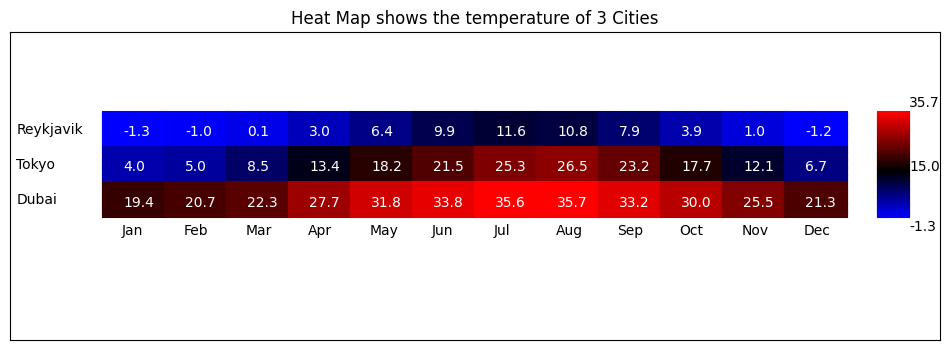

In [4]:
def DrawBox(x, y, size, r, g, b):
    for i in range(0, int(size)):
        r = max(0, min(255, r))
        g = max(0, min(255, g))
        b = max(0, min(255, b))
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r,g,b))

#threshold = float(input())
threshold = float(input("Please input the threshold"))
figure = plt.figure(figsize=(12,4))

Min = np.min(Cities)
Max = np.max(Cities)

plt.axis([0, 600, 80, 430])
plt.xticks([])
plt.yticks([])
BoxSize = int(40)
OffsetX = int(13)
OffsetY = int(12) 

for i in range(0, Cities.shape[0]):
    for j in range(0, Cities.shape[1]):
        ColourCode = int(((Cities[i, j]-Min)/(Max-Min))*255)
        if Cities[i,j] < threshold:
            intensity = int(((threshold - Cities[i, j]) / (threshold - Min)) * 255)
            DrawBox(60+BoxSize*j, 300-BoxSize*i, BoxSize, 0, 0,intensity)
        else:
            intensity = int(((Cities[i, j] - threshold) / (Max - threshold)) * 255)
            DrawBox(60+BoxSize*j, 300-BoxSize*i, BoxSize,intensity, 0, 0)
        plt.text(OffsetX+60+BoxSize*j, OffsetY+300-BoxSize*i, str(Cities[i, j]), color='#FFFFFF')

# Dynamic Color Scale Bar
scale_start = 160  # Starting Y position of the scale
scale_height = 120  # Total height of the scale bar

# Generate the blue-to-red gradient dynamically based on threshold
for i in range(scale_start, scale_start + scale_height):
    value_at_scale = Min + ((i - scale_start) / scale_height) * (Max - Min)  # Map position to data value
    
    if value_at_scale < threshold:
        intensity = int(((threshold - value_at_scale) / (threshold - Min)) * 255)
        color = (0, 0, intensity / 255)  # Blue scale
    elif value_at_scale > threshold:
        intensity = int(((value_at_scale - threshold) / (Max - threshold)) * 255)
        color = (intensity / 255, 0, 0)  # Red scale
    else:
        color = (128 / 255, 128 / 255, 128 / 255)  # Gray at threshold

    plt.plot([560, 580], [i + 60, i + 60], color=color)

plt.text(580, scale_start + int((threshold - Min) / (Max - Min) * scale_height) + 60, f"{threshold:.1f}", color='black')


# Display Min and Max values
plt.text(580, 204, str(Min))
plt.text(580, 345, str(Max))
    

plt.text(72, 200, 'Jan')
plt.text(112, 200, 'Feb')
plt.text(152, 200, 'Mar')
plt.text(192, 200, 'Apr')
plt.text(232, 200, 'May')
plt.text(272, 200, 'Jun')
plt.text(312, 200, 'Jul')
plt.text(352, 200, 'Aug')
plt.text(392, 200, 'Sep')
plt.text(432, 200, 'Oct')
plt.text(472, 200, 'Nov')
plt.text(512, 200, 'Dec')

plt.text(4, 315, 'Reykjavik')
plt.text(4, 275, 'Tokyo')                             
plt.text(4, 235, 'Dubai')

plt.title("Heat Map shows the temperature of 3 Cities")
figure.savefig("heatmap_coursework.jpg")
plt.show()




# Task 3

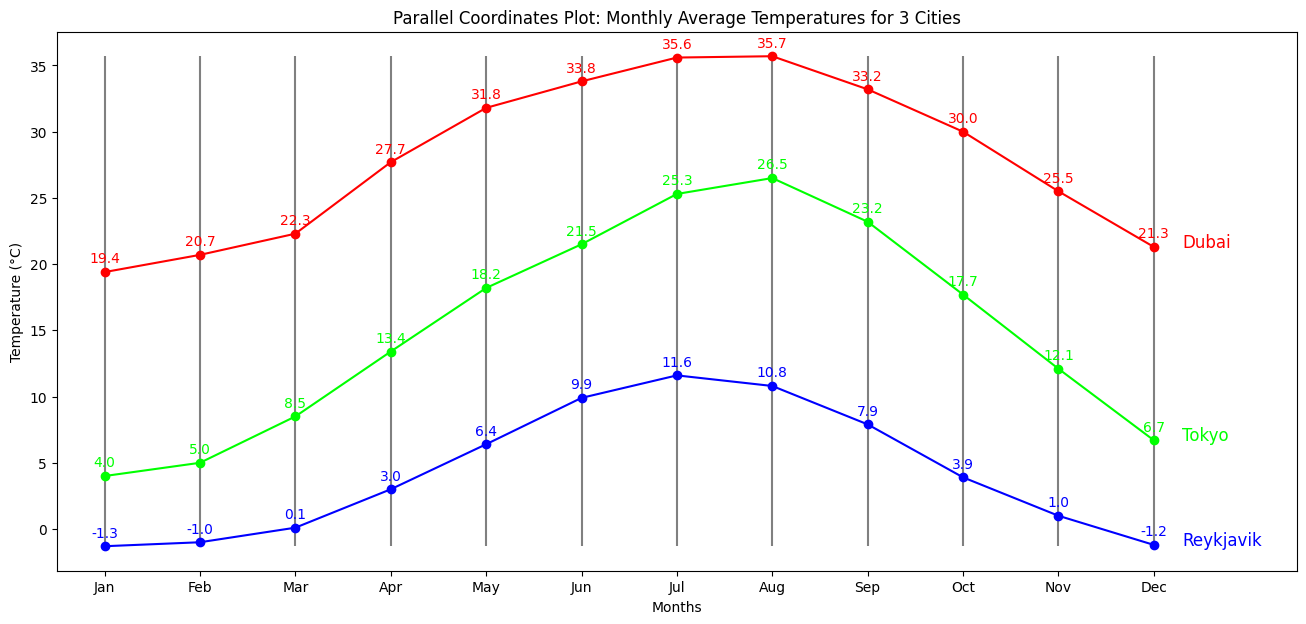

In [5]:
# Number of data samples (cities)
NumberOfCities = 3  
Scale = Cities.all()  # Temperature scale in degrees Celsius
Months = 12  # 12 dimensions


figure = plt.figure(figsize=(16,7))


# Spine names (months)
MonthNames = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Colors for each city
CityColors = ['#0000FF', '#00FF00', '#FF0000']  # Red, Green, Blue

CityNames = ["Reykjavik", "Tokyo", "Dubai"]

# Draw vertical spines (axes) for the 12 dimensions
for i in range(Months):
    plt.vlines(i, np.min(Cities), np.max(Cities), color='#808080')

# Plot each city's temperature data across 12 dimensions
for i in range(NumberOfCities):
    plt.plot(MonthNames, Cities[i], marker='o', linestyle="-", color=CityColors[i], label=CityNames[i])

    for j in range(Months):
        plt.text(j, Cities[i][j] + 0.7, str(Cities[i][j]), color=CityColors[i], fontsize=10, ha='center')
    
# Add labels for each city at the last month position
for i in range(NumberOfCities):
    plt.text(Months - 0.7 , Cities[i, -1], CityNames[i], color=CityColors[i], fontsize=12)

# Title and axis labels
plt.xlabel("Months")
plt.ylabel("Temperature (°C)")
plt.title("Parallel Coordinates Plot: Monthly Average Temperatures for 3 Cities")

plt.xlim(-0.5, Months - 0.5 + 1)  # Extends the x-axis 1 unit to the right
figure.savefig("parallel_coordinate.jpg")
# Render the plot
plt.show()
